In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor


In [3]:
df = pd.read_csv("data.csv")

df.drop(columns=['index', 'datehour', 'datemonth'], inplace=True, errors='ignore')

df['Date_Heure'] = pd.to_datetime(df['Date_Heure'], format='%m/%d/%Y %H:%M')

df['hour'] = df['Date_Heure'].dt.hour
df['day'] = df['Date_Heure'].dt.day
df['month'] = df['Date_Heure'].dt.month

In [4]:
features = ['Pression au niveau mer', 'Variation de pression en 3 heures',
            'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn',
            'Temperature', 'Point de rosee', 'Humidite', 'Visibilite horizontale',
            'Pression station', 'hour', 'day', 'month']
target = 'consommation'

In [5]:
# Remplacement de toutes les valeurs manquantes par la moyenne de chaque colonne
for col in df.columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12220\3168702551.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [6]:
print("Valeurs manquantes par colonne:")
print(df.isnull().sum())

Valeurs manquantes par colonne:
Date_Heure                                    0
Pression au niveau mer                        0
Variation de pression en 3 heures             0
Type de tendance barometrique                 0
Direction du vent moyen 10 mn                 0
Vitesse du vent moyen 10 mn                   0
Temperature                                   0
Point de rosee                                0
Humidite                                      0
Visibilite horizontale                        0
Temps present                                 0
Pression station                              0
Rafales sur une periode                       0
Periode de mesure de la rafale                0
Precipitations dans la derniere heure         0
Precipitations dans les 3 dernieres heures    0
Temperature (C)                               0
consommation                                  0
hour                                          0
day                                           0
month   

In [7]:
X = df[features]
y = df[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

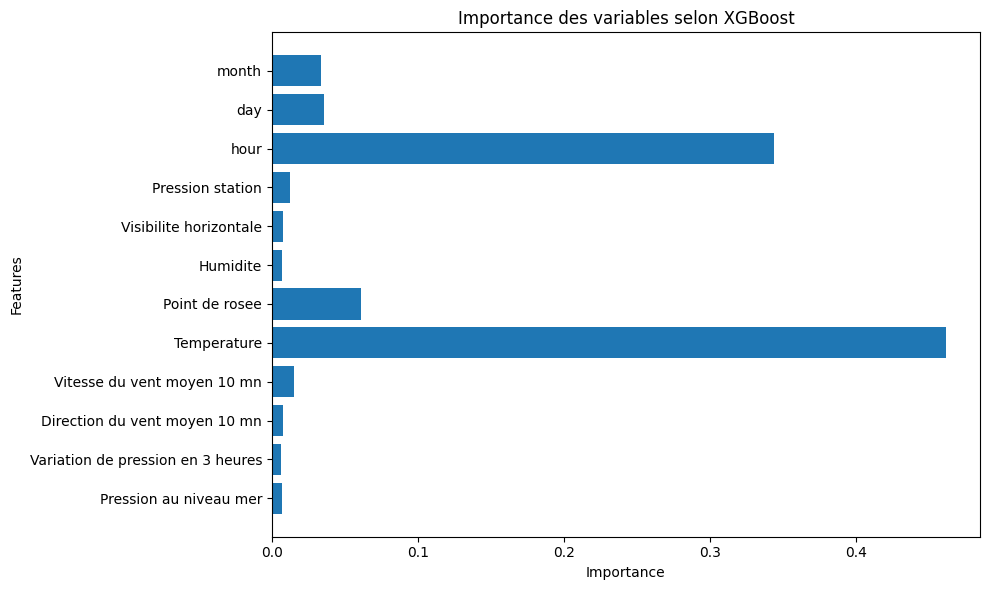

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Importance des variables selon XGBoost")
plt.tight_layout()
plt.show()

In [11]:
y_pred = model.predict(X_test)

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

MSE: 3926856.75
R2 Score: 0.8936116695404053
MAE: 1531.208984375


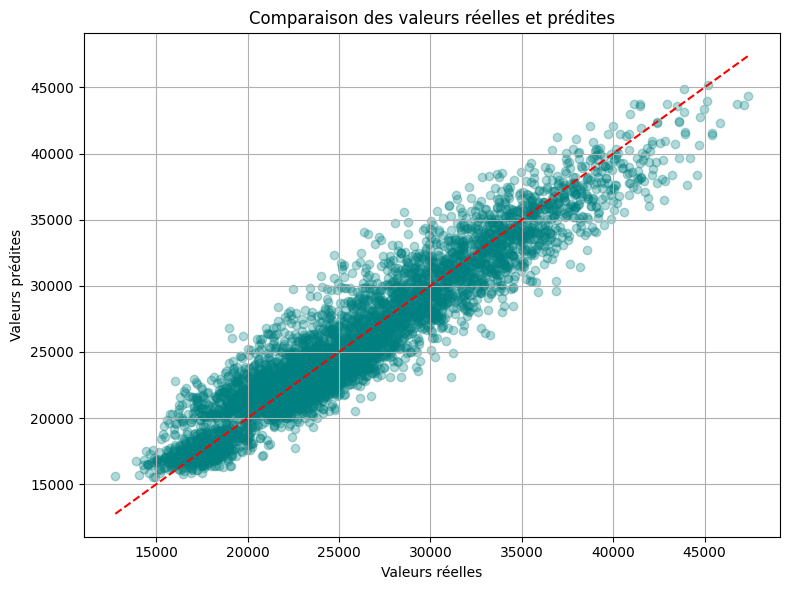

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison des valeurs réelles et prédites")
plt.grid(True)
plt.tight_layout()
plt.show()

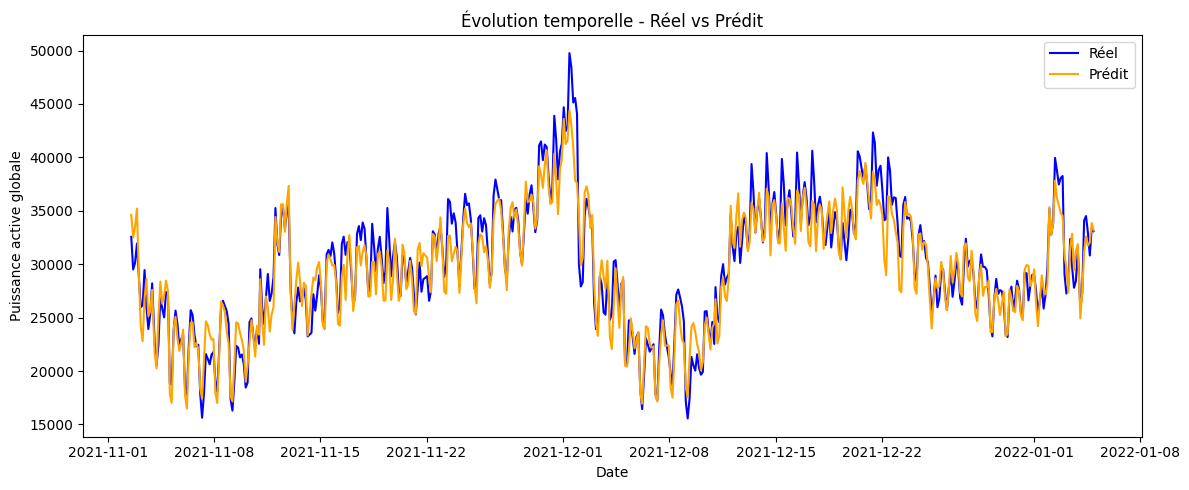

In [13]:
sample = df[['Date_Heure', 'consommation']].copy()
sample['prediction'] = model.predict(X)
sample = sample.sort_values("Date_Heure").iloc[-500:]  

plt.figure(figsize=(12, 5))
plt.plot(sample['Date_Heure'], sample['consommation'], label="Réel", color="blue")
plt.plot(sample['Date_Heure'], sample['prediction'], label="Prédit", color="orange")
plt.xlabel("Date")
plt.ylabel("Puissance active globale")
plt.title("Évolution temporelle - Réel vs Prédit")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
new_data = pd.read_csv("new_data1.csv")

for col in features:
    if col not in new_data.columns:
        new_data[col] = 0

X_new = new_data[features]
predictions = model.predict(X_new)

print(" Prédictions détaillées :")
for i, value in enumerate(predictions, 1):
    print(f"Prédiction consommation pour la ligne {i} : {value:.6f} kW")

 Prédictions détaillées :
Prédiction consommation pour la ligne 1 : 30509.109375 kW
Prédiction consommation pour la ligne 2 : 29063.416016 kW
